# Importing all required libraries

In [1]:
import pandas as pd
import numpy as np
import nltk
import heapq
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from transformers import pipeline
import matplotlib.pyplot as plt

# Loading and previewing of dataset

In [2]:
df=pd.read_csv(r"C:\Users\asus\OneDrive\Desktop\Proxenix\news_summary.csv", encoding='latin1')
df=df[['ctext', 'headlines']].dropna().reset_index(drop=True)

In [3]:
print("Dataset Loaded:")
display(df.head(2))

Dataset Loaded:


,ctext,headlines
0,The Daman and Diu administration on Wednesday ...,Daman & Diu revokes mandatory Rakshabandhan in...
1,"From her special numbers to TV?appearances, Bo...",Malaika slams user who trolled her for 'divorc...


# Selecting a sample article and its human-written summary

In [4]:
article=df['ctext'][0]
human_summary=df['headlines'][0]       
print("Original Article:\n", article)
print("\nHuman Summary:\n", human_summary)

Original Article:
 The Daman and Diu administration on Wednesday withdrew a circular that asked women staff to tie rakhis on male colleagues after the order triggered a backlash from employees and was ripped apart on social media.The union territory?s administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate Rakshabandhan at workplace.?It has been decided to celebrate the festival of Rakshabandhan on August 7. In this connection, all offices/ departments shall remain open and celebrate the festival collectively at a suitable time wherein all the lady staff shall tie rakhis to their colleagues,? the order, issued on August 1 by Gurpreet Singh, deputy secretary (personnel), had said.To ensure that no one skipped office, an attendance report was to be sent to the government the next evening.The two notifications ? one mandating the celebration of Rakshabandhan (left) and the other withdrawing the mandate (right) ? were 

# Extractive summarization using TF-IDF and generating extractive summary and display

In [5]:
def extractive_summary(text, num_sentences=2):
    sentences=sent_tokenize(text)
    if len(sentences)<=num_sentences:
        return text  
    vectorizer=TfidfVectorizer()
    tfidf_matrix=vectorizer.fit_transform(sentences)
    similarity=cosine_similarity(tfidf_matrix, tfidf_matrix)
    sentence_scores=similarity.sum(axis=1)
    top_n=heapq.nlargest(num_sentences, range(len(sentence_scores)), sentence_scores.take)
    summary=' '.join([sentences[i] for i in sorted(top_n)])
    return summary
extractive=extractive_summary(article, num_sentences=2)
print("\nExtractive Summary:\n", extractive)


Extractive Summary:
 The Daman and Diu administration on Wednesday withdrew a circular that asked women staff to tie rakhis on male colleagues after the order triggered a backlash from employees and was ripped apart on social media.The union territory?s administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate Rakshabandhan at workplace. The RSS is the ideological parent of the ruling BJP.Last year, women ministers in the Modi government went to the border areas to celebrate the festival with soldiers.


# Abstractive summarization using T5 (Transformers) and displaying abstractive summary

In [6]:
from transformers import pipeline
import transformers
transformers.logging.set_verbosity_error()
summarizer=pipeline("summarization", model="t5-small", framework="pt", device=-1)
limited_text=article[:1000]
abstractive_output=summarizer(limited_text, max_length=60, min_length=20, do_sample=False)
abstractive=abstractive_output[0]['summary_text']
print("\nAbstractive Summary:\n", abstractive)


Abstractive Summary:
 the daman and Diu administration withdrew a circular that asked women staff to tie rakhis on male colleagues . the order triggered a backlash from employees and was ripped apart on social media .


# Word count comparison

In [7]:
print("Summary Length Comparison (Word Count):")
print("Original Text:", len(article.split()), "words")
print("Human Summary:", len(human_summary.split()), "words")
print("Extractive Summary:", len(extractive.split()), "words")
print("Abstractive Summary:", len(abstractive.split()), "words")

Summary Length Comparison (Word Count):
Original Text: 364 words
Human Summary: 9 words
Extractive Summary: 89 words
Abstractive Summary: 34 words


# Word count bar graph

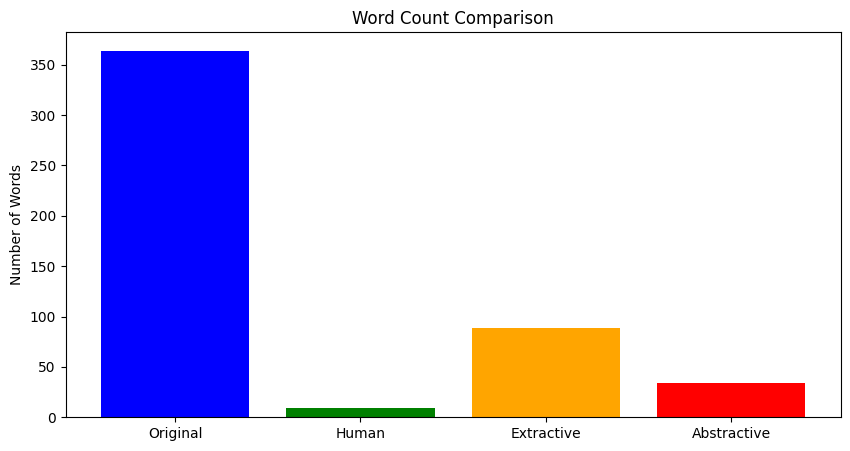

In [8]:
labels=['Original', 'Human', 'Extractive', 'Abstractive']
lengths=[len(article.split()), len(human_summary.split()), len(extractive.split()), len(abstractive.split())]
plt.figure(figsize=(10,5))
plt.bar(labels, lengths, color=['blue', 'green', 'orange', 'red'])
plt.title("Word Count Comparison")
plt.ylabel("Number of Words")
plt.grid(axis='y', linestyle=' ', alpha=0.6)
plt.show()

# Conclusion